# Pymaceuticals Inc.
---

### Analysis

- The assignment prompt does not call for any analysis to be written, nor are there any rubric items assigned to a written analysis. I think you will find the variety of charts as ample analyis for this project.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_full = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
study_full.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice = study_full['Mouse ID'].value_counts()
print(len(mice))

249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = study_full[study_full.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
study_full.loc[study_full['Mouse ID' ] == 'g989', :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = study_full[study_full['Mouse ID'] != 'g989']
cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
unique_mice = cleaned['Mouse ID'].value_counts()
print(len(unique_mice))

248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_data = cleaned.set_index(['Drug Regimen'])['Tumor Volume (mm3)']
mean = tumor_data.groupby(['Drug Regimen']).mean()
median = tumor_data.groupby(['Drug Regimen']).median()
variance = tumor_data.groupby(['Drug Regimen']).var()
std_dev = tumor_data.groupby(['Drug Regimen']).std()
sem = tumor_data.groupby(['Drug Regimen']).sem()


# Assemble the resulting series into a single summary DataFrame.
data ={
    'Tumor Volume Mean (mm3)': mean,
    'Tumor Volume Median (mm3)': median,
    'Tumor Volume Variance (mm6)': variance,
    'Tumor Volume Std Dev (mm3)': std_dev,
    'Tumor Volume SEM (mm3)': sem
}

summary = pd.DataFrame(data)

summary

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm6),Tumor Volume Std Dev (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

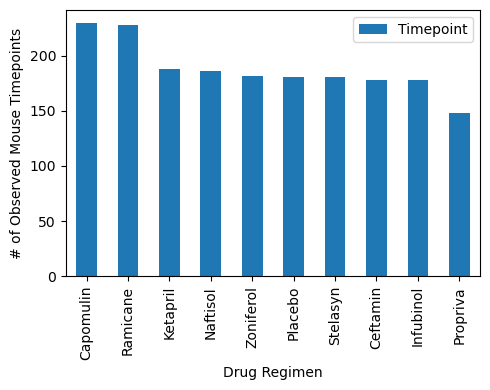

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Arrange the cleaned dataframe to give total count of mice by drug type
users = cleaned.set_index(['Drug Regimen'])['Timepoint']
users = users.groupby(['Drug Regimen']).count()

# Turn our groupby object into a dataframe
users_df = pd.DataFrame(users)

# Sort values from highest to lowest
users_df = users_df.sort_values(by='Timepoint', ascending=False)

# Use DataFrame.plot to create a bar chart out of our data frame
users_df.plot(kind='bar', figsize=(5, 4))

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()
plt.show()



In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


<function matplotlib.pyplot.show(close=None, block=None)>

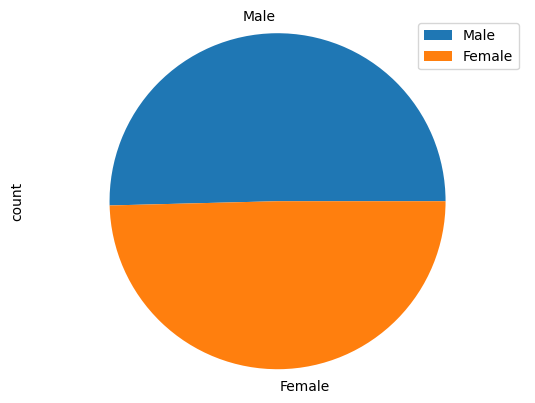

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = cleaned.set_index(['Mouse ID'])['Sex']

# Only grab the unique mouse id's once
gender = gender.groupby('Mouse ID').first()

# Count up total number of males and females
gender = gender.value_counts()

# Turn into a DataFrame
gender_df = pd.DataFrame(gender)
gender_df

# Make the pie chart
gender_pie = gender_df.plot(kind='pie', y='count', title=(''))
gender_pie.set_ylabel('count')

plt.axis('equal')
plt.show

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [136]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned.set_index(['Mouse ID'])['Timepoint']
max_timepoint = max_timepoint.groupby(['Mouse ID']).max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = pd.merge(cleaned, max_timepoint, how='left', on='Mouse ID')
merged = merged[merged['Timepoint_x'] == merged['Timepoint_y']]
merged = merged.reset_index()
del merged['index']
del merged['Timepoint_y']
merged = merged.rename(columns={'Timepoint_x': 'Final Timepoint'})
merged.head()

,Mouse ID,Final Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [259]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty lists to fill with tumor vol data (for plotting)
capomulin_tumor_volume = []
ramicane_tumor_volume = []
infubinol_tumor_volume = []
ceftamin_tumor_volume = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.


# Locate the rows which contain mice on each drug and get the tumor volumes
cleaner = merged[merged['Drug Regimen'].isin(treatments)]

# add subsets

# Final tumor volume for capomulin
for index, row in cleaner.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        capomulin_tumor_volume.append(row['Tumor Volume (mm3)'])

# Final tumor volume for ramicane
for index, row in cleaner.iterrows():
    if row['Drug Regimen'] == 'Ramicane':
        ramicane_tumor_volume.append(row['Tumor Volume (mm3)'])

# Final tumor volume for infubinol
for index, row in cleaner.iterrows():
    if row['Drug Regimen'] == 'Infubinol':
        infubinol_tumor_volume.append(row['Tumor Volume (mm3)'])

# Final tumor volume for ceftamin
for index, row in cleaner.iterrows():
    if row['Drug Regimen'] == 'Ceftamin':
        ceftamin_tumor_volume.append(row['Tumor Volume (mm3)'])


# Determine outliers using upper and lower bounds
# Turn all the lists into dataframes
tumor_volume_df = pd.DataFrame({'Capomulin': capomulin_tumor_volume,
                                          'Ramicane': ramicane_tumor_volume,
                                          'Infubinol': infubinol_tumor_volume,
                                          'Ceftamin': ceftamin_tumor_volume})
tumor_volume_df

# Outliers for capomulin
# Finding quartiles
quartiles = tumor_volume_df['Capomulin'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
capomulin_outliers = []

for x in capomulin_tumor_volume:
    if x < lower_bound or x > upper_bound:
        capomulin_outliers.append(x)

print(f"Capomulin's potential outliers: {capomulin_outliers}")

# Outliers for ramicane
# Finding quartiles
quartiles = tumor_volume_df['Ramicane'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
ramicane_outliers = []

for x in ramicane_tumor_volume:
    if x < lower_bound_0 or x > upper_bound_0:
        ramicane_outliers.append(x)

print(f"Ramicane's potential outliers: {ramicane_outliers}")

# Outliers for Infubinol
# Finding quartiles
quartiles = tumor_volume_df['Infubinol'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
infubinol_outliers = []

for x in infubinol_tumor_volume:
    if x < lower_bound or x > upper_bound:
        infubinol_outliers.append(x)

print(f"Infubinol's potential outliers: {infubinol_outliers}")

# Outliers for ceftamin
# Finding quartiles
quartiles = tumor_volume_df['Ceftamin'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Finding upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Finding outliers
ceftamin_outliers = []

for x in ceftamin_tumor_volume:
    if x < lower_bound or x > upper_bound:
        ceftamin_outliers.append(x)

print(f"Ceftamin's potential outliers: {ceftamin_outliers}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


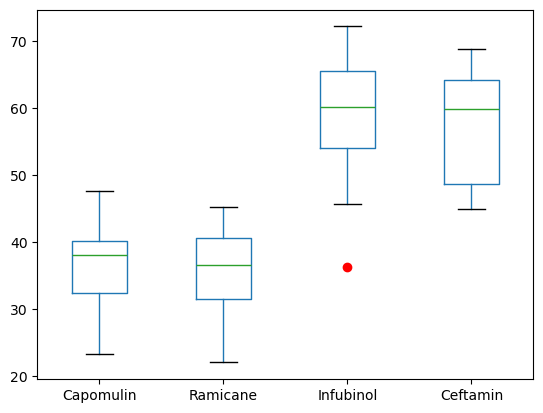

In [297]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group
boxplot = tumor_volume_df.boxplot(grid=False, sym = 'r')

## Line and Scatter Plots

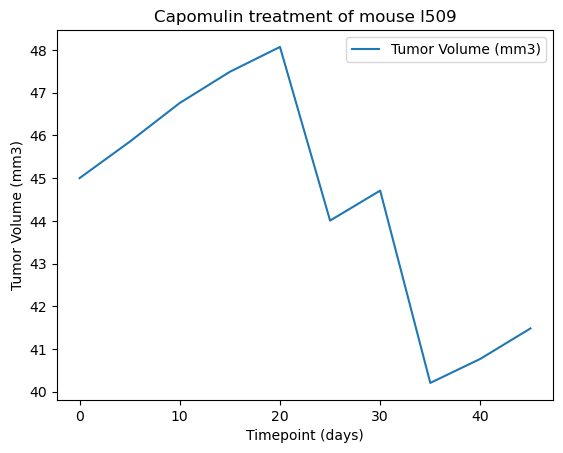

In [261]:
# Identify a single mouse on Capomulin and create a new dataframe for it's data
capomulin = cleaned[cleaned['Drug Regimen'] == 'Capomulin']
capomulin = capomulin[capomulin['Mouse ID'] == 'l509']
capomulin.reset_index()


# Plot the tumor volume by timepoint
capomulin_line = capomulin.plot(kind='line', y='Tumor Volume (mm3)', x='Timepoint', title=('Capomulin treatment of mouse l509'))
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

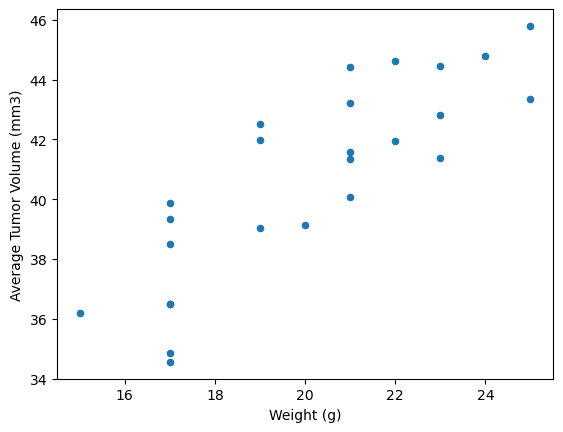

In [140]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Isolate the data for capomulin
capomulin_whole = cleaned[cleaned['Drug Regimen'] == 'Capomulin']

# Re-index and grouby to get average tumor volume by weight
capomulin_whole = capomulin_whole.set_index(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']]
capomulin_whole = capomulin_whole.groupby(['Mouse ID']).mean()

# Turn it into a dataframe
capomulin_whole
capomulin_whole_df = pd.DataFrame(capomulin_whole)
capomulin_whole_df

# Create a scattter plot of average tumor volume by weight
capomulin_scatter = capomulin_whole_df.plot(kind='scatter', y='Tumor Volume (mm3)', x='Weight (g)', title=(''))
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


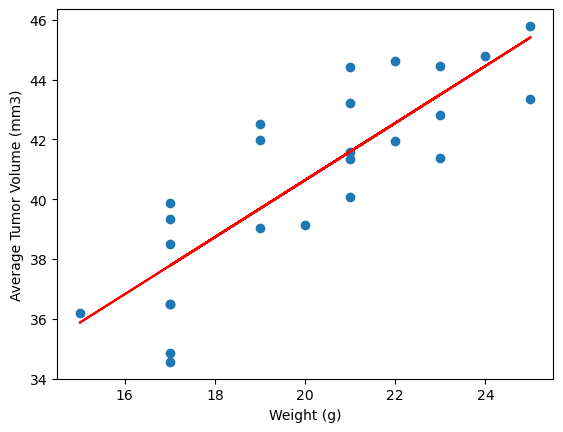

In [174]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Calculating the correlation coefficient
weight = capomulin_whole_df['Weight (g)']
tumor_volume = capomulin_whole_df['Tumor Volume (mm3)']
correlation = st.pearsonr(weight, tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Linear regression model
x_values = weight
y_values = tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()